Question 1 [Marks 40]


You work in a news agency & are responsible for identifying the most
important topic for writing articles by your content team. Develop a
Jupyter Notebook which on executing every time shows top 10 Twitter
trending topics in India in the last 24 hours. Hints: Connecting with Twitter
API. Bringing Dashboard-like behaviour in Jupyter notebook. Please note:
Visualisation is mandatory. You will receive 0 marks if you do not add
visualisation.

## Importing necessary libraries

1)  Step-1: createing Twitter API developer account.
2)  Step-2 : Generating api, access keys.
3)  Step-3 : Assigning keys to variables.
4)  Step-4 : Installing tweepy library using pip install command in terminal/

In [ ]:
import tweepy
import pandas as pd


api_key = 'GpRY5lsdiIctMQnm5dEwabqzr'
api_key_secret = 'Ob9jj3k2n1qG7L9iJV9xp72Lpbg8GwTv55L2TYQbHI0y1Xgcnz'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAALlLnwEAAAAAwACs7ztNt0E5B34pTI0VYGOikrs%3DWda5YFxhpnr5vVHw4ZxiazeKosoBqoX2aNMgjFQwvJ23MLcOUZ'
access_token = '1012017826566057984-ggoLvKhacE77UjAxcdwcwLaoZA7tbK'
access_token_secret = 'zMdOnUJghwhFpsV1L8Lny92ACYRPHWo1Jw9ukdVPjI6Uc'
clint_id = 'a2xLSklZZW5Bd3VVX1FUVjJ0ZnE6MTpjaQ'
clint_secret_id = 'ivN5XwR_g6jWVjF6AYgYqBfJUXHETF8vYziYNvb92auyovBFgy'



# Authenticate to Twitter
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

# Create an API object
tweepy.API
api = tweepy.API(auth, wait_on_rate_limit=True)
api

### API has created successfully

For india the country ID is: 23424848

As mentioned in Question we need to find the top trends in India.

In [ ]:
# Get the top 10 trending topics in India
india_id = 23424848

trends = api.get_place_trends(id=india_id)
trends

[{'trends': [{'name': '#PasooriNu',
    'url': 'http://twitter.com/search?q=%23PasooriNu',
    'promoted_content': None,
    'query': '%23PasooriNu',
    'tweet_volume': None},
   {'name': '#Missionnarzo',
    'url': 'http://twitter.com/search?q=%23Missionnarzo',
    'promoted_content': None,
    'query': '%23Missionnarzo',
    'tweet_volume': None},
   {'name': '#Fighter',
    'url': 'http://twitter.com/search?q=%23Fighter',
    'promoted_content': None,
    'query': '%23Fighter',
    'tweet_volume': None},
   {'name': '#LGSaxenaShouldResign',
    'url': 'http://twitter.com/search?q=%23LGSaxenaShouldResign',
    'promoted_content': None,
    'query': '%23LGSaxenaShouldResign',
    'tweet_volume': None},
   {'name': '#BJPGharGharSamparkAbhiyan',
    'url': 'http://twitter.com/search?q=%23BJPGharGharSamparkAbhiyan',
    'promoted_content': None,
    'query': '%23BJPGharGharSamparkAbhiyan',
    'tweet_volume': 14998},
   {'name': 'Sean Williams',
    'url': 'http://twitter.com/search?q=%

Above output shows the trends of the twitter.

Getting trending names

In [ ]:
Trends = []
for value in trends[0]["trends"]:
    Trends.append(value["name"])
print(Trends)


['#PasooriNu', '#Missionnarzo', '#Fighter', '#LGSaxenaShouldResign', '#BJPGharGharSamparkAbhiyan', 'Sean Williams', 'प्रगति मैदान टनल', 'Arijit', 'END YHC WITH ABRARGUN', 'ayesha lives as sai', 'A. Voice Focus', 'C. Super AMOLED', 'Karma Strikes Back In SSRCase', 'B. Corning Gorilla Glass 5', 'International Day', 'भारत एक्सप्रेस', 'Ali Sethi', 'राष्ट्रीय गीत', 'T-Series', 'Om Shanti', 'छत्रपति शाहूजी महाराज', 'राजधानी दिल्ली', 'सामाजिक क्रांति', 'Genocide', 'महान समाज', 'मुक्त समाज', 'महान कवि', 'Zimbabwe', 'कौशल विकास', 'बंकिम चन्द्र चट्टोपाध्याय', 'केंद्रीय शिक्षा', 'तरुण सागर', 'राजनाथ सिंह', 'Nadda', 'जैन मुनि', 'Diwali', 'Depth Campaign', 'केंद्रीय मंत्री श्री', '#GalaxyA54giveaway', '#AwesomeIsForEveryone', '#आपणो_प्रकाशभाकर', '#Sankalp_Se_Siddhi_Ke_9Saal', '#ZIMvUSA', '#नशा_मुक्त_हरियाणा', '#RinkuSingh', '#KaateraUpdate', '#TheKeralaStory', '#MondayMotivation', '#VandeBharatExpress', '#Vetrimaaran']


### Top 10 Trends in Twitter is shown below

In [ ]:
Top_10 = Trends[:10]
Top_10

['#PasooriNu',
 '#Missionnarzo',
 '#Fighter',
 '#LGSaxenaShouldResign',
 '#BJPGharGharSamparkAbhiyan',
 'Sean Williams',
 'प्रगति मैदान टनल',
 'Arijit',
 'END YHC WITH ABRARGUN',
 'ayesha lives as sai']

In [ ]:
import json

In [ ]:
retweet_data = []
for trend in Top_10:
    tweets = api.search_tweets(q=trend, count=1000, include_entities=True)
    for tweet in tweets:
        tweet_json = tweet._json
        retweet_data.append(tweet_json)

# Extract the desired fields
data = []
for tweet in retweet_data:
    name = tweet['user']['name']
    hashtags = [tag['text'] for tag in tweet['entities']['hashtags']]
    screen_name = tweet['user']['screen_name']
    followers_count = tweet['user']['followers_count']
    friends_count = tweet['user']['friends_count']
    location = tweet['user']['location']
    language = tweet['lang']

    data.append({
        'Name': name,
        'Hashtags': hashtags,
        'Screen Name': screen_name,
        'Followers Count': followers_count,
        'Friends Count': friends_count,
        'Location': location,
        'Language': language
    })

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)
df.head()

,Name,Hashtags,Screen Name,Followers Count,Friends Count,Location,Language
0,Niharika Soni,[PasooriNu],Soniniharikaa,5,81,"New Delhi, India",hi
1,@numarik.mir,[PasooriNu],NumarikM,20,107,"Srinagar , kashmir 🍁",en
2,ρяιρѕ тнє яσ¢к🦥,[PasooriNu],Pripsrout,315,188,Tunnel,en
3,mahnoor🇵🇰,[PasooriNu],Mahnoorbutt98,217,239,"Punjab, Pakistan",und
4,Amna 🇵🇰,"[SumaiyaTheLegend, HareemShah, Lahore, rain]",Amn_Amn6795,773,711,"Lahore, Pakistan",en


In [ ]:
df.shape

(987, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             987 non-null    object
 1   Hashtags         987 non-null    object
 2   Screen Name      987 non-null    object
 3   Followers Count  987 non-null    int64 
 4   Friends Count    987 non-null    int64 
 5   Location         987 non-null    object
 6   Language         987 non-null    object
dtypes: int64(2), object(5)
memory usage: 54.1+ KB


In [ ]:
df.isnull().sum()

Name               0
Hashtags           0
Screen Name        0
Followers Count    0
Friends Count      0
Location           0
Language           0
dtype: int64

In [ ]:
languages = df.Language.value_counts(normalize=True)*100
languages

en     67.679838
hi     19.452888
und     7.497467
gu      3.242148
in      0.709220
et      0.405268
ht      0.202634
tl      0.202634
ur      0.101317
te      0.101317
es      0.101317
mr      0.101317
bn      0.101317
lv      0.101317
Name: Language, dtype: float64

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

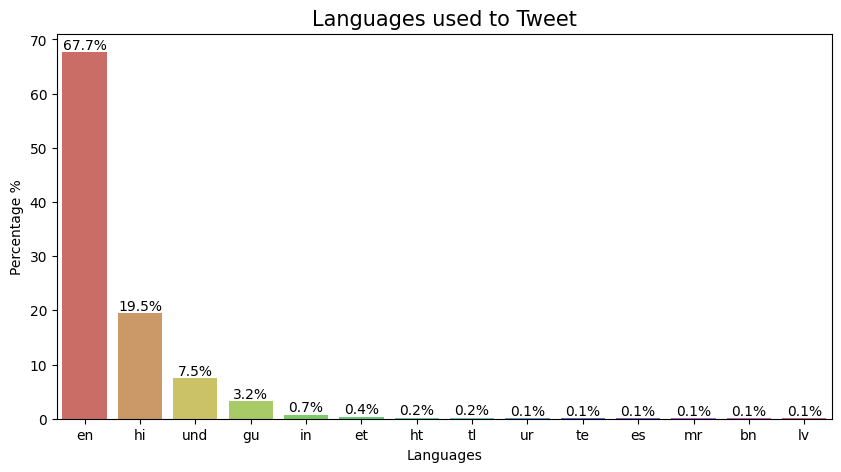

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Languages used to Tweet", fontsize= 15)
hel = sns.barplot(x= languages.index,y= languages.values, data= df, palette= "hls" )
plt.xlabel("Languages", fontsize= 10)
plt.ylabel("Percentage %", fontsize= 10)
hel.bar_label(hel.containers[0], fmt='%.1f%%')
plt.show()

In [ ]:
followers  = df[['Name', 'Followers Count', 'Friends Count']]
followers

,Name,Followers Count,Friends Count
0,Niharika Soni,5,81
1,@numarik.mir,20,107
2,ρяιρѕ тнє яσ¢к🦥,315,188
3,mahnoor🇵🇰,217,239
4,Amna 🇵🇰,773,711
...,...,...,...
982,Arti Patel,12,126
983,Arti Patel,12,126
984,Arti Patel,12,126
985,Arti Patel,12,126


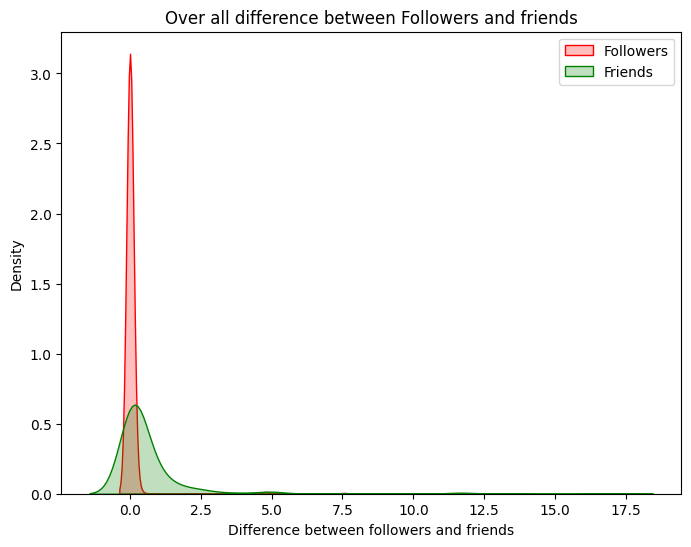

In [ ]:
colors = ['red', 'green']

plt.figure(figsize=(8, 6))
sns.kdeplot(followers['Followers Count']/100000, color=colors[0], label='Followers', fill=True)
sns.kdeplot(followers['Friends Count']/1000, color=colors[1], label='Friends', fill=True)
plt.xlabel('Difference between followers and friends')
plt.ylabel('Density')
plt.title('Over all difference between Followers and friends')
plt.legend()
plt.show()

### Highest teets

In [ ]:
twts = df['Name'].value_counts()
twts

DINESH KUMAR CHAUDHARY                             111
🌙🫶✨                                                 27
Arti Patel                                          22
darr                                                20
its_me_sara...                                      19
                                                  ... 
Urstruleysrinu                                       1
G Sai                                                1
PRS Neurosciences & Mechatronics Research Inst.      1
Hrx_Army⚔️ #Fighter                                  1
Queensla                                             1
Name: Name, Length: 504, dtype: int64

In [ ]:
values = {
    'Name' : [twts.idxmax(), twts.idxmin()],
    'value' : [twts.max(), twts.min()]
}

values

{'Name': ['DINESH KUMAR CHAUDHARY', 'Suryakant Tripathi'], 'value': [111, 1]}

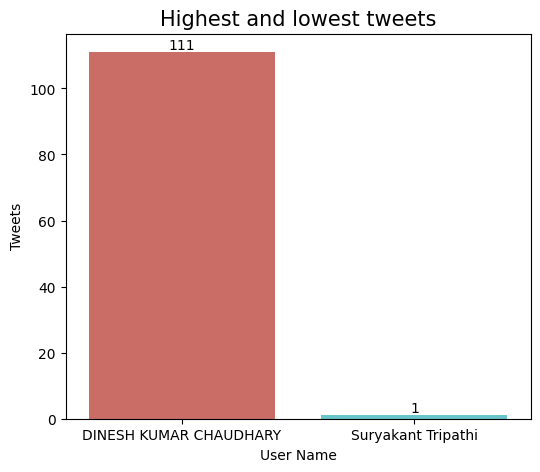

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Highest and lowest tweets", fontsize= 15)
hel = sns.barplot(x= values['Name'],y= values['value'], data= df, palette= "hls" )
plt.xlabel("User Name", fontsize= 10)
plt.ylabel("Tweets", fontsize= 10)
hel.bar_label(hel.containers[0], fmt='%.f')
plt.show()

# Conclussion :-


1) I have successfully accessed the twitter API.

2) Top 10 trends as on 26/06/2023 is below.
    '#PasooriNu',
    '#Missionnarzo',
    '#Fighter',
    '#LGSaxenaShouldResign',
    '#BJPGharGharSamparkAbhiyan',
    'Sean Williams',
    'प्रगति मैदान टनल',
    'Arijit',
    'END YHC WITH ABRARGUN',
    'ayesha lives as sai'

3) In tweeter 67.7 % of people are tweeted in English, and 19.5% are tweeted in Hindi. We can see other languages in above graph.

4) There are huge difference between Followers andd Friends same was observed in above graph.

5) Highest tweets was tweeted by 'DINESH KUMAR CHAUDHARY' and lowest tweets was tweeted by 'Suryakant Tripathi'